<a href="https://www.kaggle.com/code/kelixirr/in-depth-random-forests-and-ensemble-learning?scriptVersionId=158166183" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Random Forests And Ensemble Learning by Amritesh Kumar Neuraldemy

In this notebook we are going to implement the concepts we learnt in the tutorials and see how we can use ensemble learning and random forests in practice.

## Disclaimer: ##

- Please note that this notebook is part of the Neuraldemy tutorial and is made available free for all. Theory based concepts are available in our in depth tutorial on our website. Please visit to register. 

- Before you read this notebook make sure to learn Decision trees from our tutorial here: https://neuraldemy.com/tag/decision-trees/ then move to our theory and then this notebook. 

**How to access in depth tutorial?**

Please visit our in depth tutorial here and enroll. 

https://neuraldemy.com/in-depth-random-forests-ensemble-learning-concept-and-application/


## How to ensemble models?

In this section we will see how we can train different models and combine them using voting methods. Sklearn offers two methods: 

1. `VotingClassifier`: The idea behind the `VotingClassifier` is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing models in order to balance out their individual weaknesses. 
2. `VotingRegressor`: The idea behind the `VotingRegressor` is to combine conceptually different machine learning regressors and return the average predicted values. Such a regressor can be useful for a set of equally well performing models in order to balance out their individual weaknesses. 

### Hard Voting With `VotingClassifier`

In [8]:
from sklearn import datasets

# we will use this 
from sklearn.ensemble import VotingClassifier 
from sklearn.model_selection import cross_val_score

# import classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# dataset
iris = datasets.load_iris()

# selecting on two middle columns
X, y = iris.data[:, 1:3], iris.target


# creating classifiers
clf1 = LogisticRegression(random_state=42)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

# ensembling classifiers for voting 
eclf = VotingClassifier(estimators = [('lr', clf1), ('Rf', clf2), ('gnb', clf3)],
                         voting = "hard") # explained in tutorial

# printing scores for each one of them

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.94 (+/- 0.04) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive Bayes]
Accuracy: 0.95 (+/- 0.04) [Ensemble]


You can compare the results of our enesemble with individual models

### Soft Voting With `VotingClassifier`

In contrast to majority voting (hard voting), soft voting returns the class label as argmax of the sum of predicted probabilities.

Specific weights can be assigned to each classifier via the `weights` parameter. When weights are provided, the predicted class probabilities for each classifier are collected, multiplied by the classifier weight, and averaged. The final class label is then derived from the class label with the highest average probability.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, 1:3]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True) # specify probability for soft voting in SVC

eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

for clf, label in zip([clf1, clf2, clf3, eclf], ['DT', 'KNC', 'SVC', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.94 (+/- 0.02) [DT]
Accuracy: 0.95 (+/- 0.04) [KNC]
Accuracy: 0.95 (+/- 0.04) [SVC]
Accuracy: 0.95 (+/- 0.03) [Ensemble]


### Tuning the hyperparameter of ensemble model

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1.0, 100.0]}
grid = GridSearchCV(estimator=eclf, param_grid=param_grid, cv=5)
grid = grid.fit(iris.data, iris.target)
grid.best_params_

{'svc__C': 1.0}

### `VotingRegressor` For Regressors Models 

For regression model, we also have VotingRegressor in Sklearn. The idea behind the `VotingRegressor` is to combine conceptually different machine learning regressors and return the average predicted values. Such a regressor can be useful for a set of equally well performing models in order to balance out their individual weaknesses.

We will use some ensemble models that you may not be familiar with but I want you to just focus on the results. 

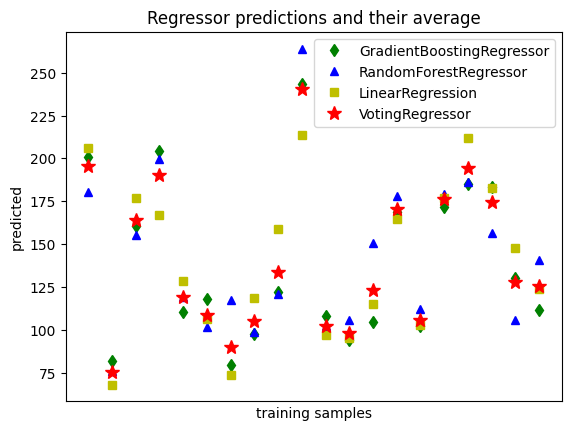

In [34]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression

X, y = load_diabetes(return_X_y=True)

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X, y)

# make prediction
xt = X[:20]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)


# plot the predictions
plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

## Bagging And Pasting
These concepts are already explained in the tutorial. Instead of using different models in this ensembling approach we will use same model and train them on different subsets of sample.

Here again sklearn offers two classes for classification and regression ensembles

In [36]:
# Let's create random forests using bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# create bagging ensemble
bagging_clf = BaggingClassifier(estimator = DecisionTreeClassifier(),
                            n_estimators = 500,
                            max_samples  = 0.5,
                            max_features = 0.5,
                            bootstrap = True,    
                            bootstrap_features = True,
                            random_state = 42)

bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)
bagging_clf.score(X_test, y_pred)

1.0

The same process can be done for regression models as well using `BaggingRegressor` Now let's understand their parameters. The hyperparameters are same for both the classes. 

- estimator, default = None: The base estimator to fit on random subsets of the dataset. If `None`, then the base estimator is a Decision Tree. 
- n_estimators: int, default=10. The number of base estimators in the ensemble.
- max_samples: The number of samples to draw from X to train each base estimator (with replacement by default)
- max_features: The number of features to draw from X to train each base estimator ( without replacement by default)
- bootstrap: default = True. Whether samples are drawn with replacement. If False, sampling without replacement is performed. 
- bootstrap_features: default = True. Whether features are drawn with replacement.
- oob_score: Whether to use out-of-bag samples to estimate the generalization error. Only available if bootstrap = True.
- warm_start: When warm_start is set to False (the default), calling fit will create a new ensemble from scratch, and any existing information about the previous fit will be discarded. When warm_start is set to True, calling fit will reuse the existing solution and add more estimators to the ensemble. It's like starting the training process from the existing state, incorporating the new estimators without discarding the knowledge gained from the previous ones. 
- n_jobs: The number of jobs to run in parallel for both fit and predict. None means 1. -1 means using all processors.
- random_state: Controls the random resampling of the original dataset (sample wise and feature wise). If the base estimator accepts a random_state attribute, a different seed is generated for each instance in the ensemble. 
- verboseint: default=0. Controls the verbosity when fitting and predicting.

### Performing Out Of Bag Evaluation As Explained In Tutorial

In [44]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# create bagging ensemble
bagging_clf = BaggingClassifier(estimator = DecisionTreeClassifier(),
                            n_estimators = 500,
                            max_samples  = 0.5,
                            max_features = 0.5,
                            oob_score = True,
                            bootstrap = True,    
                            bootstrap_features = True,
                            random_state = 42)

bagging_clf.fit(X_train, y_train)
bagging_clf.oob_score_

0.9238095238095239

In [47]:
 bagging_clf.oob_decision_function_[:5]

array([[0.02553763, 0.96693548, 0.00752688],
       [0.        , 0.48780612, 0.51219388],
       [0.02831021, 0.10495516, 0.86673462],
       [0.01084947, 0.85668547, 0.13246507],
       [0.06688963, 0.01505017, 0.9180602 ]])

So, when we `oob_score` equal to `True` our model is evaluating on left out samples and giving us this score. This means our model should give us accuracy close to this on unseen data. Decision function is giving us the class probabilities for evaluated samples.

In [45]:
from sklearn.metrics import accuracy_score
y_preds = bagging_clf.predict(X_test)
accuracy_score(y_test, y_preds)

1.0

This is how you can evalaute your model performance while performing bagging. Perfect 1 score may be a sign that your model requires some degree of reguralization. If you want to introduce more randomoness. You can use the concepts of random patches and random subspaces. 

**Random Patches:**

What it does: RandomPatches is a strategy where not only different subsets of samples (data points) are selected for each base learner, but also a random subset of features is chosen for each learner.

How to use it: You can set the `max_features` parameter to a value less than 1.0 to specify the fraction of features to consider for each base learner. For example, if `max_features=0.5`, each base learner will be trained on a random subset of 50% of the features.

**Random Subspaces:**
What it does: RandomSubspaces is a strategy where only different subsets of features are selected for each base learner, but all samples are used for training.

How to use it:You can set the bootstrap parameter to False to disable sampling with replacement of samples. For example, `bootstrap=False` ensures that each base learner is trained on the entire dataset.

When you are building decision tree based classifier or regressors instead of above approach you can use a better optimized Sklearn class for these tasks called `RandomForestClassifier` and `RandomForestRegressor`

## Random Forests

In [50]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 200,
                             criterion = "entropy",
                             max_leaf_nodes = 12,
                             oob_score = True,
                             n_jobs = -1)

clf.fit(X_train, y_train)
clf.oob_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

The same can be done for regression task using `RandomForestRegressor` class. Please make sure to check their hyperparameters on your own in Sklearn official documentation. You can also use `ExtraTreesClassifier` if you want to introduce more randomness. Here randomness goes one step further in the way splits are computed. As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. 

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(n_samples=10000, n_features=10, centers=100,
    random_state=0)

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
    random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())

clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())

clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())

0.9823000000000001
0.9997
1.0


You can see the scores above for each one of them.

## Feature Importance

In sklearn, while dealing with decision trees. Feature importance are caluclated based on mean decrease in impurity or MDI. It measures the importance of each feature in a decision tree or a random forest model. 

1. Decision Trees: In a decision tree, each node represents a split based on a feature and a threshold. The impurity of a node is a measure of how mixed the classes are in that node.The MDI for a feature is calculated by summing the improvement in impurity (reduction in uncertainty) over all nodes where that feature is used for splitting. Features that lead to nodes with larger impurity reductions are considered more important.

2. Random Forests: In a random forest, MDI is extended to an ensemble of decision trees. The MDI for a feature in a random forest is calculated by averaging the MDI values across all the trees in the ensemble.

However, there are some problem with MDI based feature importance:

1. Impurity-based importances are biased towards high cardinality features: Impurity-based methods can favor high cardinality features, meaning features with many unique values. This bias occurs because splitting on high cardinality features provides more opportunities to reduce impurity. Permutation feature importance helps mitigate this bias by evaluating feature importance based on the actual predictive performance improvement when the values of a feature are permuted.

2. Impurity-based importances are computed on training set statistics and therefore do not reflect the ability of feature to be useful to make predictions that generalize to the test set (when the model has enough capacity): Impurity-based feature importances are computed based on statistics derived from the training dataset, and they may not necessarily reflect the importance of features in making predictions on a held-out dataset. This is because the model could have memorized patterns in the training data (overfitting) that do not generalize well. Permutation feature importance addresses this by evaluating the impact of shuffling feature values, providing a more robust measure of feature importance. 

To mitigate these limitations of MDI, you can use permutation based feature importance measure. Permutation feature importance involves randomly shuffling the values of a single feature and measuring the change in model performance (e.g., accuracy, mean squared error) on a held-out dataset. This process is repeated for each feature, and the drop in performance provides a more reliable estimate of the importance of each feature.

Let's see how we can calculate permuation based feature importance in random forest models.

In [9]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

# we are using titanic dataset in pandas by setting as_frame = True and parser as pandas
X, y = fetch_openml(
    "titanic", version=1, as_frame=True, return_X_y=True, parser="pandas"
)

rng = np.random.RandomState(seed=42)

# Add a high cardinality numerical variable to X with as many unique values
X["random_cat"] = rng.randint(3, size=X.shape[0])

# Add a high cardinality categorical variable to X with 3 uniqur values
X["random_num"] = rng.randn(X.shape[0])

#the above two values are not correlated with our target in any way

In [10]:
X[:5]

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,random_cat,random_num
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",2,-1.110576
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,1.752270
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2,0.935678
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",2,1.271555
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,0.721672


In [11]:
X.dtypes

pclass           int64
name            object
sex           category
age            float64
sibsp            int64
parch            int64
ticket          object
fare           float64
cabin           object
embarked      category
boat            object
body           float64
home.dest       object
random_cat       int64
random_num     float64
dtype: object

In [5]:
X["random_cat"]

0       2
1       0
2       2
3       2
4       0
       ..
1304    2
1305    2
1306    1
1307    1
1308    2
Name: random_cat, Length: 1309, dtype: int64

In [6]:
X["random_num"]

0      -1.110576
1       1.752270
2       0.935678
3       1.271555
4       0.721672
          ...   
1304   -0.971657
1305   -1.379618
1306   -0.626717
1307    0.862393
1308    0.953125
Name: random_num, Length: 1309, dtype: float64

In [12]:
# Create a new dataset based on our main data set by limiting it to num and cat values
categorical_columns = ["pclass", "sex", "embarked", "random_cat"]
numerical_columns = ["age", "sibsp", "parch", "fare", "random_num"]

X = X[categorical_columns + numerical_columns]
X

,pclass,sex,embarked,random_cat,age,sibsp,parch,fare,random_num
0,1,female,S,2,29.0000,0,0,211.3375,-1.110576
1,1,male,S,0,0.9167,1,2,151.5500,1.752270
2,1,female,S,2,2.0000,1,2,151.5500,0.935678
3,1,male,S,2,30.0000,1,2,151.5500,1.271555
4,1,female,S,0,25.0000,1,2,151.5500,0.721672
...,...,...,...,...,...,...,...,...,...
1304,3,female,C,2,14.5000,1,0,14.4542,-0.971657
1305,3,female,C,2,NaN,1,0,14.4542,-1.379618
1306,3,male,C,1,26.5000,0,0,7.2250,-0.626717
1307,3,male,C,1,27.0000,0,0,7.2250,0.862393


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [14]:
#Perform data pre-processing
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

categorical_encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1, encoded_missing_value=-1
)
numerical_pipe = SimpleImputer(strategy="mean")

preprocessing = ColumnTransformer(
    [
        ("cat", categorical_encoder, categorical_columns),
        ("num", numerical_pipe, numerical_columns),
    ],
    verbose_feature_names_out=False,
)

In [27]:
# fit the model
rf = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", RandomForestClassifier(random_state=42)),
    ]
)
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(encoded_missing_value=-1,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['pclass', 'sex', 'embarked',
                                                   'random_cat']),
                                                 ('num', SimpleImputer(),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare', 'random_num'])],
                                   verbose_feature_names_out=False)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [28]:
# check the accuracy of our model
print(f"RF train accuracy: {rf.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {rf.score(X_test, y_test):.3f}")

RF train accuracy: 1.000
RF test accuracy: 0.814


In [29]:
import pandas as pd

#from ColumnTransformer
feature_names = rf[:-1].get_feature_names_out()

# get the MDI based feature importances which is default
mdi_importances = pd.Series(
    rf[-1].feature_importances_, index=feature_names
).sort_values(ascending=True)

mdi_importances

embarked      0.032626
parch         0.034633
sibsp         0.039423
random_cat    0.040856
pclass        0.068293
age           0.166723
random_num    0.193266
fare          0.194910
sex           0.229270
dtype: float64

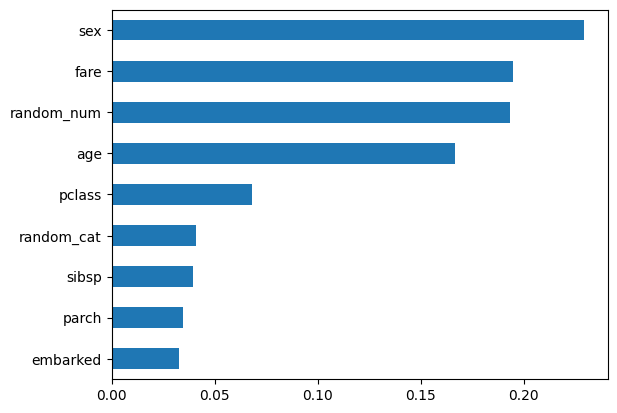

In [30]:
mdi_importances.plot(kind = "barh");

As you can see that our model is giving importance to features with high cardinality values features such as random_num and random_cat which infact had nothing to do with the target variable. The bias towards high cardinality features explains why the random_num has a really large importance in comparison with random_cat while we would expect both random features to have a null importance.

In [34]:
# permutation based feature importances on training dataset

from sklearn.inspection import permutation_importance

# permuting the features 10 times 
result = permutation_importance(
    rf, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort() 

permutation_importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)

In [35]:
permutation_importances

,parch,sibsp,random_cat,embarked,random_num,pclass,fare,age,sex
0,0.024465,0.032620,0.054027,0.056065,0.110092,0.121305,0.136595,0.124363,0.269113
1,0.023445,0.031600,0.056065,0.063201,0.100917,0.151886,0.146789,0.125382,0.257900
2,0.025484,0.036697,0.049949,0.053007,0.120285,0.144750,0.131498,0.122324,0.261978
3,0.020387,0.040775,0.048930,0.053007,0.109072,0.119266,0.146789,0.126402,0.281346
4,0.021407,0.040775,0.051988,0.058104,0.107034,0.132518,0.139653,0.139653,0.272171
5,0.023445,0.035678,0.046891,0.049949,0.108053,0.134557,0.125382,0.147808,0.277268
6,0.023445,0.037717,0.045872,0.045872,0.119266,0.128440,0.132518,0.141692,0.251784
7,0.020387,0.031600,0.049949,0.054027,0.110092,0.137615,0.116208,0.147808,0.261978
8,0.023445,0.035678,0.056065,0.054027,0.092762,0.131498,0.132518,0.133537,0.265036
9,0.021407,0.038736,0.056065,0.050968,0.112130,0.129460,0.137615,0.137615,0.280326


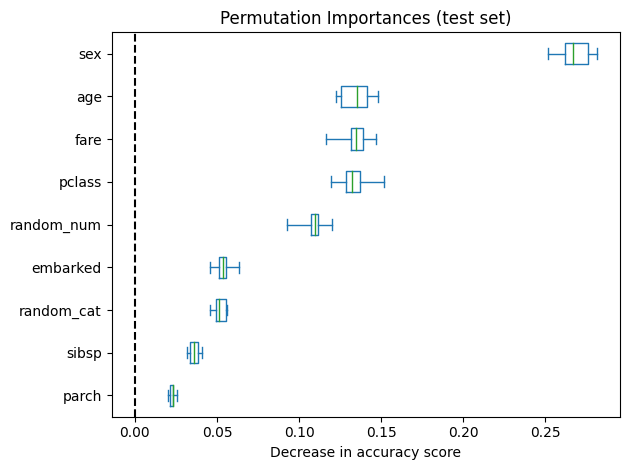

In [42]:
# We will use box plot in this case
ax = permutation_importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

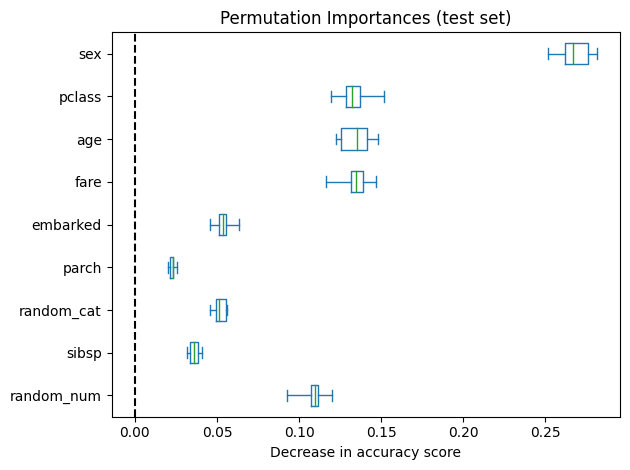

In [43]:
# Based on test dataset 
t_result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = t_result.importances_mean.argsort()
t_importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = t_importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

You can easily see the difference between the two methods. You should use permutation based feature importance method when you have high cardinality in your dataset features. This concludes this section

## Boosting
Check tutorial for the detail theory.


### AdaBoost
The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. The data modifications at each so-called boosting iteration consists of applying weights to each of the training samples. Initially, those weights are all set to 1/n so that the first step simply trains a weak learner on the original data. For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence. 

In Sklearn: 

1. For multi-class classification, AdaBoostClassifier implements AdaBoost-SAMME and AdaBoost-SAMME.R. SAMME is designed for classifiers that output discrete class labels.SAMME.R is an improvement that extends SAMME to handle classifiers that provide real-valued class probabilities. The default it set to SAMME.R as it results in lower error. They are also called real AdaBoost and discrete AdaBoost. You can check the perfomance [difference here](https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_hastie_10_2.html#sphx-glr-auto-examples-ensemble-plot-adaboost-hastie-10-2-py). Additionally Adaboost also results in better performance on multi-class problems since it uses boosting. 

2. For regression, AdaBoostRegressor implements AdaBoost.R2

AdaBoost Binary Classification:

1. Assign equal weights to all training examples: $w_i = \frac{1}{N}$ for $i = 1, 2, ..., N$, where $N$ is the number of training examples.
2. Train a weak learner (e.g., decision stump) on the training data using the current weights $w_i$.
The weak learner minimizes the weighted error $\epsilon_t = \sum_{i=1}^{N} w_i^{(t)} \cdot \mathbb{I}(y_i \neq h_t(x_i))$.
3. Calculate the weight of the weak learner in the final ensemble: $\alpha_t = \frac{1}{2} \log\left(\frac{1 - \epsilon_t}{\epsilon_t}\right)$.
4. Update the weights of the training instances:
   - For incorrectly classified instances: $w_i^{(t+1)} = w_i^{(t)} \cdot e^{\alpha_t}$.
   - For correctly classified instances: $w_i^{(t+1)} = w_i^{(t)} \cdot e^{-\alpha_t}$.
5. The final model is a weighted sum of weak learners: $H(x) = \text{sign}\left(\sum_{t=1}^{T} \alpha_t \cdot h_t(x)\right)$.

The extension to multiclass is typically done using the one-vs-all (OvA) strategy. The main modification is in the computation of the final model. For K classes: 
$H(x) = \text{argmax}_k \left(\sum_{t=1}^{T} \alpha_t \cdot \mathbb{I}(k = h_t(x))\right)$

For SAMME (Stagewise Additive Modeling using a Multi-class Exponential loss): 
$H(x) = \text{argmax}_k \left(\sum_{t=1}^{T} \beta_t \cdot \mathbb{I}(k = h_t(x))\right)$

For SAMME.R (Stagewise Additive Modeling using a Multi-class Exponential loss with Real-valued Predictions): $H(x) = \text{argmax}_k \left(\sum_{t=1}^{T} \beta_t \cdot h_t(x)\right)$

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.9466666666666665

In [45]:
# You can similarly use it for regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=0, shuffle=False)
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X, y)
regr.predict([[0, 0, 0, 0]])
regr.score(X, y)

0.9771376939813695

You should check out the important parameters for Adaboost in sklearn implementation. You should note one thing that you can't be fully parallelized like the previous algorithm in bagging. Additionally, A higher learning rate increases the contribution of each regressor. There is a `trade-off` between the `learning_rate` and n_estimators parameters. You can adjust them based on results by performing multiple tests and find the best model.


### Relationship Between Weak Learner Errors And Weights In Adaboost

We see that the error of the weak learner is the inverse of the weights. It means that our additive model will trust more a weak learner that makes smaller errors (on the training set) by increasing its impact on the final decision.

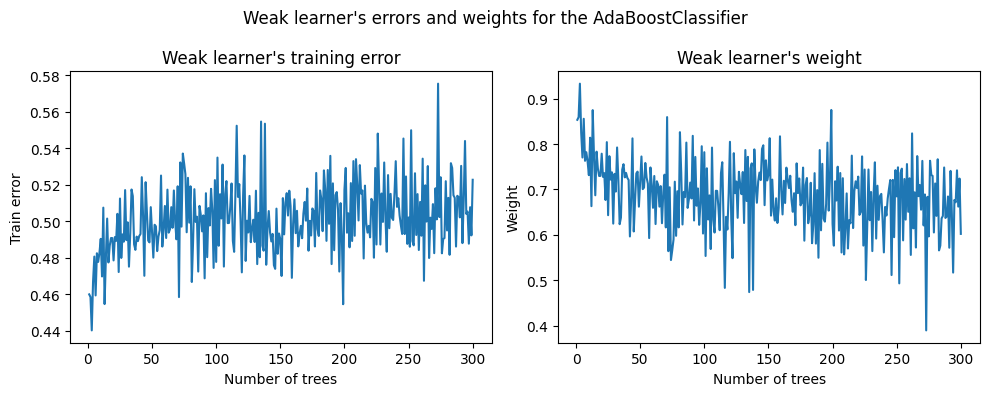

In [48]:
from sklearn.datasets import make_gaussian_quantiles

X, y = make_gaussian_quantiles(
    n_samples=2_000, n_features=10, n_classes=3, random_state=1
)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=42
)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

weak_learner = DecisionTreeClassifier(max_leaf_nodes=8)
n_estimators = 300

adaboost_clf = AdaBoostClassifier(
    estimator=weak_learner,
    n_estimators=n_estimators,
    algorithm="SAMME",
    random_state=42,
).fit(X_train, y_train)

weak_learners_info = pd.DataFrame(
    {
        "Number of trees": range(1, n_estimators + 1),
        "Errors": adaboost_clf.estimator_errors_,
        "Weights": adaboost_clf.estimator_weights_,
    }
).set_index("Number of trees")

axs = weak_learners_info.plot(
    subplots=True, layout=(1, 2), figsize=(10, 4), legend=False, color="tab:blue"
)
axs[0, 0].set_ylabel("Train error")
axs[0, 0].set_title("Weak learner's training error")
axs[0, 1].set_ylabel("Weight")
axs[0, 1].set_title("Weak learner's weight")
fig = axs[0, 0].get_figure()
fig.suptitle("Weak learner's errors and weights for the AdaBoostClassifier")
fig.tight_layout()

We see that the error of the weak learner is the inverse of the weights. It means that our additive model will trust more a weak learner that makes smaller errors (on the training set) by increasing its impact on the final decision.

### Gradient Boosting

For detailed concepts check the tutorial 

- **Step 1:** Train a weak learner on the current data with weighted instances.
- **Step 2:** Calculate the weight of the weak learner based on its accuracy.
- **Step 3:** Adjust instance weights, giving more emphasis to misclassified instances.
- **Final Model:** Combine weak learners with their weights to create a strong ensemble model.

1. Assign equal weights to all training examples: $ w_i = \frac{1}{N} $ for $ i = 1, 2, ..., N $, where $ N $ is the number of training examples.
2. For $ t = 1 $ to $ T $: 1. **Train a weak learner:**
   - Train a weak learner (e.g., decision stump) on the training data using the current weights $ w_i $.
   - The weak learner minimizes the weighted error $ \epsilon_t = \sum_{i=1}^{N} w_i^{(t)} \cdot \text{I}(y_i \neq h_t(x_i)) $.
3. Calculate the weight of the weak learner in the final ensemble: $ \alpha_t = \frac{1}{2} \log\left(\frac{1-\epsilon_t}{\epsilon_t}\right) $.
4. The final model is a weighted sum of weak learners:
  $ H(x) = \text{sign}\left(\sum_{t=1}^{T} \alpha_t \cdot h_t(x)\right)$


### Gradient Boosting with Residual Fitting

- **Step 1:** Compute pseudo-residuals by taking the negative gradient of the loss function.
- **Step 2:** Fit a weak learner to the pseudo-residuals, minimizing the loss on the residuals.
- **Step 3:** Update the model by adding a scaled version of the weak learner to the current model.
- **Final Model:** Combine weak learners to form the final boosted model.

Initialize the model with a constant value: $ ( F_0(x) = \text{argmin}_c \sum_{i=1}^{N} L(y_i, c) ), where ( L ) $ is the loss function.

 For \( t = 1 \) to \( T \):
1. **Compute pseudo-residuals:**
   - Compute the negative gradient of the loss function with respect to the current model's prediction: $ ( r_{it} = -\left[\frac{\partial L(y_i, F_{t-1}(x_i))}{\partial F_{t-1}(x_i)}\right]_{F_{t-1}(x_i)} ), for ( i = 1, 2, ..., N ). $

2. **Fit a weak learner to pseudo-residuals:**
   - Train a weak learner (e.g., decision tree) on the pseudo-residuals: $ ( h_t(x) = \text{argmin}_h \sum_{i=1}^{N} L(y_i, F_{t-1}(x_i) + h(x_i)) ) $

3. **Update the model:**
   - Update the model: $ ( F_t(x) = F_{t-1}(x) + \nu \cdot h_t(x) ), where ( \nu ) $ is the  learning rate


The final model is the sum of weak learners: $ ( F(x) = \sum_{t=1}^{T} \nu \cdot h_t(x) ) $


**Gradient Boosted Decision Trees (GBDT)**

Scikit-learn provides two implementations of gradient-boosted trees: `HistGradientBoostingClassifier` vs `GradientBoostingClassifier` for classification, and the corresponding classes for regression. The former can be orders of magnitude faster than the latter when the number of samples is larger than tens of thousands of samples.

Missing values and categorical data are natively supported by the Hist version, removing the need for additional preprocessing such as imputation.

`GradientBoostingClassifier` and `GradientBoostingRegressor`, might be preferred for small sample sizes since binning may lead to split points that are too approximate in this setting. 

`HistGradientBoostingClassifier` and `HistGradientBoostingRegressor`, in sklearn are inspired by LightGBM. 



**`GradientBoostingClassifier` class** 

This algorithm builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage `n_classes_` regression trees are fit on the negative gradient of the loss function, e.g. binary or multiclass log loss. Binary classification is a special case where only a single regression tree is induced.

`HistGradientBoostingClassifier` is a much faster variant of this algorithm for intermediate datasets (n_samples >= 10_000).

In [50]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.913

Some important parameters you should keep in mind. Full list is not provided here.

1. n_estimatorsint, default=100: The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance. Values must be in the range [1, inf).

2. subsamplefloat, default=1.0: The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias. Values must be in the range (0.0, 1.0].

3. n_iter_no_changeint, default=None: It is used to decide if early stopping will be used to terminate training when validation score is not improving. By default it is set to None to disable early stopping. If set to a number, it will set aside validation_fraction size of the training data as validation and terminate training when validation score is not improving in all of the previous n_iter_no_change numbers of iterations. The split is stratified. Values must be in the range [1, inf).

You should also check out their documentation for some attributes as well. Additionally, classification with more than 2 classes requires the induction of n_classes regression trees at each iteration, thus, the total number of induced trees equals n_classes * n_estimators. For datasets with a large number of classes it is strongly recommend to use HistGradientBoostingClassifier. 

You can also find OOB scores by keeping the subsamples to less than 1. 

The parameter learning_rate strongly interacts with the parameter n_estimators, the number of weak learners to fit. Smaller values of learning_rate require larger numbers of weak learners to maintain a constant training error. Empirical evidence suggests that small values of learning_rate favor better test error. 

stochastic gradient boosting, which combines gradient boosting with bootstrap averaging (bagging). At each iteration the base classifier is trained on a fraction subsample of the available training data. The subsample is drawn without replacement. A typical value of subsample is 0.5. Subsampling with shrinkage can further increase the accuracy of the model. 

The following loss functions are supported and can be specified using the parameter loss:

Regression

- Squared error ('squared_error'): The natural choice for regression due to its superior computational properties. The initial model is given by the mean of the target values.

- Absolute error ('absolute_error'): A robust loss function for regression. The initial model is given by the median of the target values.

- Huber ('huber'): Another robust loss function that combines least squares and least absolute deviation; use alpha to control the sensitivity with regards to outliers (see [Friedman2001] for more details).

- Quantile ('quantile'): A loss function for quantile regression. Use 0 < alpha < 1 to specify the quantile. This loss function can be used to create prediction intervals (see Prediction Intervals for Gradient Boosting Regression).

Classification

- Binary log-loss ('log-loss'): The binomial negative log-likelihood loss function for binary classification. It provides probability estimates. The initial model is given by the log odds-ratio.

- Multi-class log-loss ('log-loss'): The multinomial negative log-likelihood loss function for multi-class classification with n_classes mutually exclusive classes. It provides probability estimates. The initial model is given by the prior probability of each class. At each iteration n_classes regression trees have to be constructed which makes GBRT rather inefficient for data sets with a large number of classes.

- Exponential loss ('exponential'): The same loss function as AdaBoostClassifier. Less robust to mislabeled examples than 'log-loss'; can only be used for binary classification.

Tips on Reguralization: 

You can reguralize the model by via shrinkage (learning_rate < 1.0) improves performance considerably. In combination with shrinkage, stochastic gradient boosting (subsample < 1.0) can produce more accurate models by reducing the variance via bagging. Subsampling without shrinkage usually does poorly. Another strategy to reduce the variance is by subsampling the features analogous to the random splits in Random Forests (via the max_features parameter)


**`GradientBoostingRegressor` class** 

The mean squared error (MSE) on test set: 3020.8539


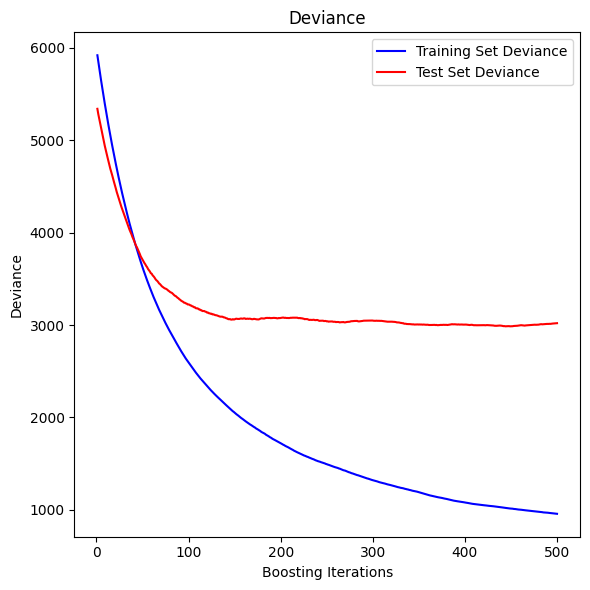

In [55]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))


test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

If you want to add more estimators you can set warm_start=True in set_params which allows you to add more estimators to an already fitted model: 
```model.set_params(n_estimators=300, warm_start=True)
model.fit(X_train, y_train)```

**`HistGradientBoostingClassifier and HistGradientBoostingRegressor`**

In LightGBM the histogram-based learning approach involves organizing data into bins during the training process. Instead of using the exact values of features, these features are discretized into bins, and a histogram is constructed for each feature.

The advantages of using bins in LightGBM include:

- Efficiency: Binning reduces the number of unique feature values, making it faster to construct histograms during tree construction.
- Memory Efficiency: Storing and processing data in bins can be more memory-efficient than using exact values.
- Parallelization: Construction of histograms in bins can be easily parallelized, enhancing the efficiency of the training process.


Sklean implementation of `HistGradientBoostingClassifier and HistGradientBoostingRegressor` is inspired by LightGBM. They also have built-in support for missing values, which avoids the need for an imputer. These fast estimators first bin the input samples X into integer-valued bins (typically 256 bins) which tremendously reduces the number of splitting points to consider, and allows the algorithm to leverage integer-based data structures (histograms) instead of relying on sorted continuous values when building the trees. The API of these estimators is slightly different, and some of the features from GradientBoostingClassifier and GradientBoostingRegressor are not yet supported, for instance some loss functions.

Available losses for regression are ‘squared_error’, ‘absolute_error’, which is less sensitive to outliers, and ‘poisson’, which is well suited to model counts and frequencies. For classification, ‘log_loss’ is the only option. For binary classification it uses the binary log loss, also known as binomial deviance or binary cross-entropy. For n_classes >= 3, it uses the multi-class log loss function, with multinomial deviance and categorical cross-entropy as alternative names. The appropriate loss version is selected based on y passed to fit.

The size of the trees can be controlled through the max_leaf_nodes, max_depth, and min_samples_leaf parameters.

The number of bins used to bin the data is controlled with the max_bins parameter. Using less bins acts as a form of regularization. It is generally recommended to use as many bins as possible (256), which is the default.

The l2_regularization parameter is a regularizer on the loss function. 

This is faster as compared to previous boosting methods because it does not require sorting features and because it uses a data-structure called a histogram, where the samples are implicitly ordered.

Here is how you convert any dataset to histogram data structure. This example shows histogram for just one feature but you can do it for all features by using for loop.

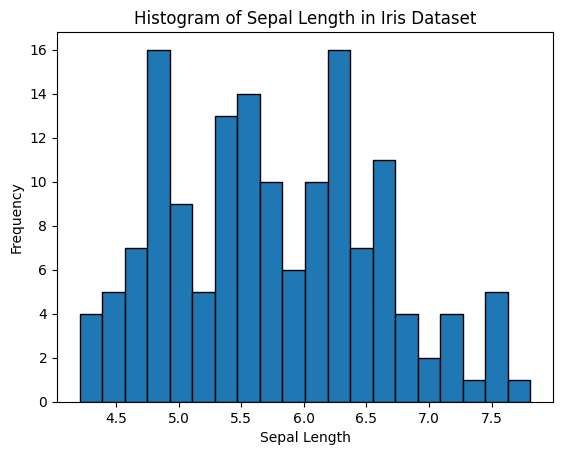

Histogram Data Structure:
Bin Edges: [4.3  4.48 4.66 4.84 5.02 5.2  5.38 5.56 5.74 5.92 6.1  6.28 6.46 6.64
 6.82 7.   7.18 7.36 7.54 7.72 7.9 ]
Bin Counts: [ 4  5  7 16  9  5 13 14 10  6 10 16  7 11  4  2  4  1  5  1]


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Select the 'sepal_length' column as our feature
sepal_length_data = iris['sepal_length']

# Step 1: Binning Process
# Determine the range of data
data_min = sepal_length_data.min()
data_max = sepal_length_data.max()

# Decide on the number of bins
num_bins = 20

# Divide the range into equal-width bins
bin_edges = np.linspace(data_min, data_max, num_bins + 1)

# Step 2: Assign Data Points to Bins
# Initialize an array to store counts for each bin
bin_counts = np.zeros(num_bins, dtype=int)

# For each data point, determine the bin and increment the count
for value in sepal_length_data:
    bin_index = np.searchsorted(bin_edges, value, side="right") - 1
    bin_index = max(0, min(bin_index, num_bins - 1))
    bin_counts[bin_index] += 1

# Step 3: Construct Histogram Data Structure
histogram_data_structure = {
    "bin_edges": bin_edges,
    "bin_counts": bin_counts
}

# Visualize the histogram
plt.bar(bin_edges[:-1], bin_counts, width=(bin_edges[1] - bin_edges[0]), edgecolor='black')
plt.title('Histogram of Sepal Length in Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.show()

# Display the constructed histogram data structure
print("Histogram Data Structure:")
print("Bin Edges:", histogram_data_structure["bin_edges"])
print("Bin Counts:", histogram_data_structure["bin_counts"])

Sklearn natively does this for you so you don't need to do anything. 

In [6]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
clf = HistGradientBoostingClassifier().fit(X, y)
clf.score(X, y)

1.0

In [7]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)
est = HistGradientBoostingRegressor().fit(X, y)
est.score(X, y)

0.9299589575098558

Notes on hyperparameters of these classes: 

1. Here max_iter parameter replaces n_estimators. 
2. The early-stopping behaviour is controlled via the early_stopping, scoring, validation_fraction, n_iter_no_change, and tol parameters. By default, early-stopping is performed if there are at least 10,000 samples in the training set, and uses the validation loss.
3. It has built-in support for missing values (NaNs). 
4. You can also assign sample weight in the fit method. 
5. It also supports categorical features natively using categorical_features parameter. It should be your optimal choice instead of one-hot-econding etc. because they are slow and require more tree depth to achieve equivalent splits. You can verify that by training models with and without one-hot encoding. 
6. monotonic_cst paramter is used only in binary cases. In a binary classification context, imposing a monotonic increase (decrease) constraint means that higher values of the feature are supposed to have a positive (negative) effect on the probability of samples to belong to the positive class.Nevertheless, monotonic constraints only marginally constrain feature effects on the output.You can specify a monotonic constraint on each feature using this parameter. For each feature, a value of 0 indicates no constraint, while 1 and -1 indicate a monotonic increase and monotonic decrease constraint, respectively. [Check this for more](https://scikit-learn.org/stable/auto_examples/ensemble/plot_monotonic_constraints.html#sphx-glr-auto-examples-ensemble-plot-monotonic-constraints-py). 
7. interaction_cst: This is an interaction constraints, the sets of features which can interact with each other in child node splits. Each item specifies the set of feature indices that are allowed to interact with each other. If there are more features than specified in these constraints, they are treated as if they were specified as an additional set.For instance, with 3 features in total, interaction_cst=[{0}, {1}, {2}] forbids all interactions. And [{0, 1}, {1, 2}] specifies two groups of possibly interacting features. Features 0 and 1 may interact with each other, as well as features 1 and 2. But note that features 0 and 2 are forbidden to interact. Another example, with 5 features in total, interaction_cst=[{0, 1}] is equivalent to interaction_cst=[{0, 1}, {2, 3, 4}], and specifies that each branch of a tree will either only split on features 0 and 1 or only split on features 2, 3 and 4.

You should check out their other parameters on your own.

## Stacking
Stacking is explained the tutorial.In sklearn StackingClassifier and StackingRegressor provide such strategies which can be applied to classification and regression problems. It is use mainly to reduce biases. 

In [16]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
X, y = load_iris(return_X_y=True)

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(), cv = 5
)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42
)
clf.fit(X_train, y_train).score(X_test, y_test)

0.9473684210526315

In [17]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
X, y = load_diabetes(return_X_y=True)
estimators = [
    ('lr', RidgeCV()),
    ('svr', LinearSVR(random_state=42))
]
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42)
)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)
reg.fit(X_train, y_train).score(X_test, y_test)

0.3645307483308553

## XGBOOST

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. It also offers similar interface as sklearn but some things may not be available so please check out their algorithm. 

You can use XGBOOST in your problems instead of sklearn if you are planning to work on some solid datasets using boosting. You can visit this API refrence which is similar to Sklearn. 

https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn

Choosing Between Sklearn Boosting Models Vs XGBOOST:

1. Size of Data: For large datasets, especially in tabular data scenarios, XGBoost's efficiency and parallelization can be advantageous.

2. For smaller datasets or quick prototyping, scikit-learn might be more convenient. Complexity of the Task: If the task requires a high level of predictive accuracy and the dataset is complex, XGBoost might be a good choice. For simpler tasks or when interpretability is a priority, scikit-learn may be more suitable.

3. Community and Documentation: Consider the availability of community support and documentation for each library, especially if you are looking for extensive resources and tutorials.

In [19]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
clf = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [23]:
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the California housing dataset
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define hyperparameters
params = {
    'objective': 'reg:squarederror',  # Regression task
    'colsample_bytree': 0.3,  # Fraction of features to be randomly sampled for each tree
    'learning_rate': 0.1,  # Step size shrinkage to prevent overfitting
    'max_depth': 5,  # Maximum depth of a tree
    'alpha': 10,  # L1 regularization term on weights
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.8316425262308655


In [25]:
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters
params = {
    'objective': 'reg:squarederror',  # Regression task
    'colsample_bytree': 0.3,  # Fraction of features to be randomly sampled for each tree
    'learning_rate': 0.1,  # Step size shrinkage to prevent overfitting
    'max_depth': 5,  # Maximum depth of a tree
    'alpha': 10,  # L1 regularization term on weights
}

# Create XGBoost regressor
xg_reg = xgb.XGBRegressor(**params)

# Train the model
xg_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xg_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.30586403747737034


## Application: Face completion with a multi-output estimators

This example shows the use of multi-output estimator to complete images. The goal is to predict the lower half of a face given its upper half. The first column of images shows true faces. The next columns illustrate how extremely randomized trees, k nearest neighbors, linear regression and ridge regression complete the lower half of those faces.

Source: Sklearn

In [26]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.utils.validation import check_random_state

# Load the faces datasets
data, targets = fetch_olivetti_faces(return_X_y=True)

train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces,))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, : (n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2 :]
X_test = test[:, : (n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2 :]

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [27]:
# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(
        n_estimators=10, max_features=32, random_state=0
    ),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

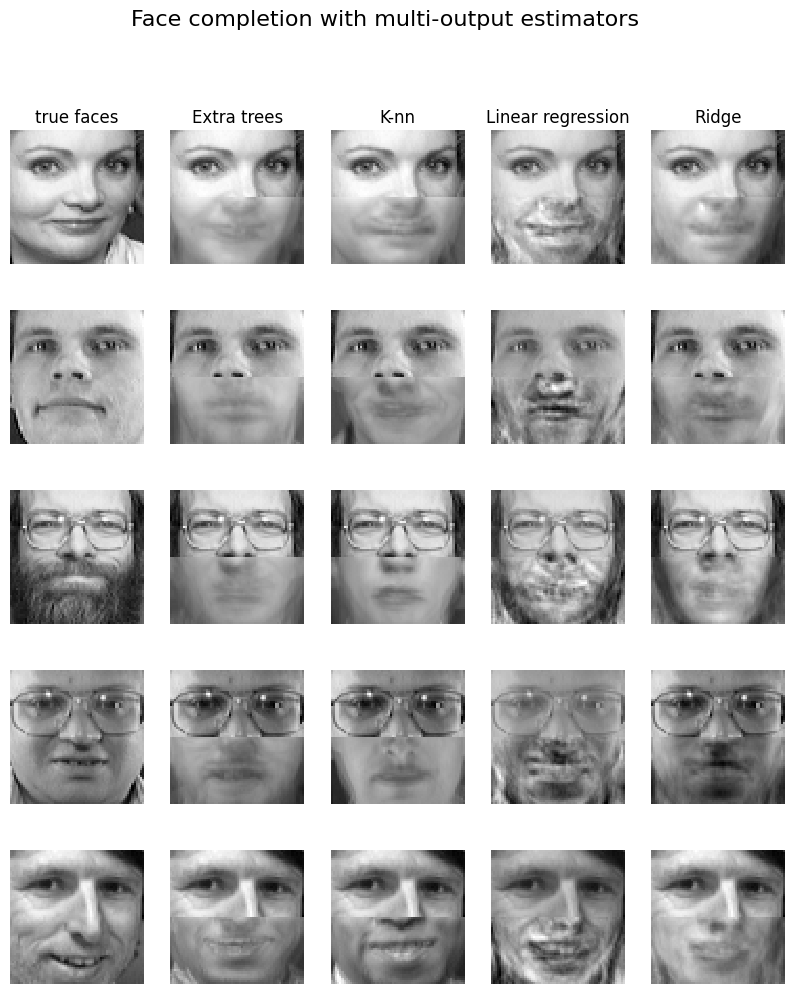

In [28]:
# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2.0 * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()

## Some Questiosn Related To The Above Concepts

**If you have trained five different models on the exact same training data, and
they all achieve 95% precision, is there any chance that you can combine these
models to get better results? If so, how? If not, why?**

Yes, it is possible using ensembl learning but If all your five models achieve 95% precision and they make errors on different instances, combining them through any of the mentioned methods may improve the overall performance. However, if the models are highly correlated and make similar errors, the improvement may be marginal. Ensembling works best when models are independent.

**What is the benefit of out-of-bag evaluation?**

some key advantages of OOB evaluation:

1. No Need for a Separate Validation Set: OOB allows you to estimate the performance of the model without the need to set aside a separate validation set. This can be particularly useful when you have a limited amount of data, as you can use all available data for training.

2. Unbiased Estimate: OOB samples are not used during the training of a particular base model within the ensemble. This means that each base model is evaluated on instances it has not seen during training, providing an unbiased estimate of its performance on unseen data.

3. Efficient Use of Data: mSince OOB evaluation uses the training data that was not included in the construction of each base model, it allows for a more efficient use of available data. This is especially beneficial when the dataset is small.

4. Automatically Handles Ensembles of Varying Sizes: In bagging algorithms like Random Forest, where each base model is trained on a bootstrap sample, the OOB samples naturally emerge from instances that were not included in the training set for a specific model. This makes OOB evaluation easy to implement without additional effort.

5. Saves Computation Time: OOB evaluation is performed during the training process without requiring additional computations. This is advantageous compared to cross-validation, which may involve training and evaluating multiple models.

**What makes Extra-Trees more random than regular Random Forests? How can
this extra randomness help? Are Extra-Trees slower or faster than regular Ran‐
dom Forests?**

In a regular Random Forest, when constructing a decision tree at each node, a random subset of features is considered, and the best split is chosen from among these features. This helps introduce diversity among the trees. In Extra-Trees, the feature selection process is even more random. Instead of finding the best split among the features, Extra-Trees randomly choose a threshold for each feature and use the one that yields the best split. This additional level of randomness makes Extra-Trees more diverse. By introducing additional randomness in feature selection and split points, Extra-Trees create more diverse trees in the ensemble, potentially capturing different patterns in the data. The increased diversity often leads to reduced variance, which can improve the generalization performance of the ensemble, especially when dealing with noisy or complex datasets. Also, because Extra-Trees don't spend time looking for the best points, they train much faster. However, when it comes to making predictions, they're not faster or slower than regular Random Forests. 

**The above questions are taken from Hands on machine learning book.** 

Here are some more conceptual questions: 

**Consider an ensemble model consisting of highly accurate base models. Can the ensemble's performance be improved further by introducing models with lower individual accuracy?** 

The performance of an ensemble with highly accurate base models depends on the level of diversity among the models. If all base models are highly accurate but similar, the ensemble may not gain much from their combination. The strength of an ensemble lies in the diversity of its base models. If all models make similar errors, the ensemble may not perform significantly better.Introducing base models with lower individual accuracy can be beneficial if they provide different perspectives or capture different aspects of the data.
Considerations:

While high-accuracy models contribute valuable predictions, the ensemble's success depends on diverse and complementary information from individual models.

**Ensemble methods are known to improve generalization performance, but what are the potential drawbacks or limitations associated with ensemble learning?**

- Overfitting Risk:Ensembles can still overfit if the base models are too complex or if there is insufficient diversity among them.

- Computational Complexity: Training and maintaining multiple models can be computationally expensive, especially for large datasets.

- Interpretability: Ensembles are often considered as "black-box" models, making it challenging to interpret and understand their decision-making process


## Reading This Noetbook On Kaggle? 

If you found this notebook helpful consider upvoting it. If you want to learn concepts behind these applications and other ML algorithms please visit: https://neuraldemy.com/updates/

Thank you! 

**Upvote And Follow**